# Statefarm Distracted Driver Solve
https://www.kaggle.com/c/state-farm-distracted-driver-detection

Using VGG16 model to solve above kaggle competition


In [2]:
#from utils.py import plots
import numpy as np
import pandas as pd

from vgg16 import VGG_16
from utils import *

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 770 (CNMeM is disabled, cuDNN 5110)


In [3]:
%matplotlib inline

* c0: safe driving
* c1: texting - right
* c2: talking on the phone - right
* c3: texting - left
* c4: talking on the phone - left
* c5: operating the radio
* c6: drinking
* c7: reaching behind
* c8: hair and makeup
* c9: talking to passenger

In [11]:
cat =  ['safe driving',
        'texting - right',
        'talking on the phone - right',
        'texting - left',
        'talking on the phone - left',
        'operating the radio',
        'drinking',
        'reaching behind',
        'hair and makeup',
        'talking to passenger']

In [4]:
epochs_training = 1

data_set = './data/distracteddriver/'
dir_data = data_set + 'sample/'
fname_submission =  data_set +'submission.csv'
fname_model =  data_set +'model/weights.h5'

model = VGG_16(dir_data, batch_size=24)

./data/distracteddriver/sample/train
Found 197 images belonging to 10 classes.
./data/distracteddriver/sample/valid
Found 19 images belonging to 10 classes.
./data/distracteddriver/sample/test
Found 100 images belonging to 1 classes.


In [5]:
import os.path
if os.path.exists(fname_model):
    print("loading trained weights first")
    model.model.load_weights(fname_model)

#model.fit(nb_epoch=epochs_training)
model.model.save_weights(fname_model)

loading trained weights first


In [5]:
%pwd

u'/home/docker/fastai'

(imgs, labels) = next(model.gen_train)

n = 4
imgs = imgs[:4]
labels = labels[:4]
plots(imgs, titles=labels) #Use utily.py plot function for ease


print(model.predict(imgs))


## Review Trained model

In [6]:
classes = model.classes

In [14]:
# Get predictions for validation set
pred = model.predict_gen(model.gen_valid)
pred = [ c[1:] for c in pred]
pred = map(int, pred)

pred[:10]
[cat[p] for p in pred[:10]]

['talking on the phone - left',
 'drinking',
 'reaching behind',
 'talking on the phone - right',
 'talking on the phone - left',
 'texting - left',
 'hair and makeup',
 'talking on the phone - right',
 'drinking',
 'operating the radio']

In [15]:
# get labels
labels = model.gen_valid.classes
labels[:10]
[cat[p] for p in labels[:10]]

['safe driving',
 'safe driving',
 'texting - right',
 'texting - right',
 'talking on the phone - right',
 'talking on the phone - right',
 'texting - left',
 'texting - left',
 'talking on the phone - left',
 'talking on the phone - left']

[[0 1 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 1 0]
 [0 0 0 1 1 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 1 0 0 0 0]]


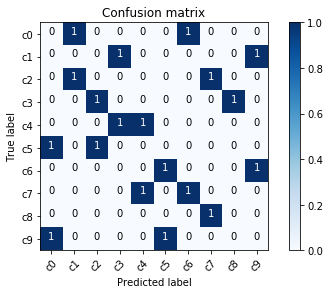

In [10]:
# plot confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels, pred)

plot_confusion_matrix(cm, classes)

## Output Submission

In [ ]:
# Run model on test data and get predictions
model.test()
preds = model.test_preds


In [ ]:
preds[:5]


In [ ]:
classes = model.classes
classes

In [ ]:
#isdog = preds[:,1]
#isdog = isdog.clip(min=0.05, max=0.95)
#isdog[:5]

In [ ]:
fnames = np.array(model.gen_test.filenames)

#strip category folder
fnames = np.array([f[f.find('/')+1:] for f in fnames])


In [ ]:
fnames.shape

In [ ]:
subm = pd.DataFrame(preds, columns=classes) #Create dataframe with test results
subm.insert(0,"img",fnames) # insert filenames to the first column
subm.head()

In [ ]:
subm.to_csv(fname_submission, index=False)

imgs = next(batches_test)

n = 4
imgs = imgs[:4]
labels = labels[:4]
plots(imgs, titles=labels) #Use utily.py plot function for ease


print(model.predict(imgs))
